In [2]:
import numpy as np
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib import colors
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import pickle as pk

In [10]:
hess = None
SHIR = None
MCF = None
with open("hessSol_6_10.pd","rb") as f:
    hess = pk.load(f)

with open("SHIRSol.pd","rb") as f:
    SHIR = pk.load(f)
    
with open("MCFSol.pd","rb") as f:
    MCF = pk.load(f)
    
with open("DISTSol.pd","rb") as f:
    DIST = pk.load(f)
    
with open("CUTSol_6_10.pd","rb") as f:
    CUT = pk.load(f)

In [6]:
convertSHIR = {}
flag = 1
for i in set(SHIR.values()):
    convertSHIR[i] = flag
    flag += 1

In [7]:
for key in SHIR:
    SHIR[key] = convertSHIR[SHIR[key]]

In [4]:
convertHess = {}
flag = 1
for i in set(hess.values()):
    convertHess[i] = flag
    flag += 1
for key in hess:
    hess[key] = convertHess[hess[key]]

In [10]:
convertMCF = {}
flag = 1
for i in set(MCF.values()):
    convertMCF[i] = flag
    flag += 1
for key in MCF:
    MCF[key] = convertMCF[MCF[key]]

In [11]:
convertDIST = {}
flag = 1
for i in set(DIST.values()):
    convertDIST[i] = flag
    flag += 1
for key in DIST:
    DIST[key] = convertDIST[DIST[key]]

In [11]:
convertCUT = {}
flag = 1
for i in set(CUT.values()):
    convertCUT[i] = flag
    flag += 1
for key in CUT:
    CUT[key] = convertCUT[CUT[key]]

In [13]:
convertMCF

{'n_x2_y1': 1,
 'n_x4_y6': 2,
 'n_x0_y2': 3,
 'n_x1_y6': 4,
 'n_x0_y5': 5,
 'n_x3_y3': 6}

In [14]:
SHIR

{'n_x0_y0': 1,
 'n_x0_y1': 4,
 'n_x0_y2': 4,
 'n_x0_y3': 4,
 'n_x0_y4': 3,
 'n_x0_y5': 5,
 'n_x0_y6': 5,
 'n_x0_y7': 5,
 'n_x1_y0': 1,
 'n_x1_y1': 1,
 'n_x1_y2': 4,
 'n_x1_y3': 4,
 'n_x1_y4': 3,
 'n_x1_y5': 3,
 'n_x1_y6': 3,
 'n_x1_y7': 5,
 'n_x2_y0': 1,
 'n_x2_y1': 1,
 'n_x2_y2': 1,
 'n_x2_y3': 6,
 'n_x2_y4': 3,
 'n_x2_y5': 3,
 'n_x2_y6': 5,
 'n_x2_y7': 5,
 'n_x3_y0': 1,
 'n_x3_y1': 1,
 'n_x3_y2': 6,
 'n_x3_y3': 6,
 'n_x3_y4': 6,
 'n_x3_y5': 2,
 'n_x3_y6': 2,
 'n_x3_y7': 2,
 'n_x4_y0': 1,
 'n_x4_y1': 1,
 'n_x4_y2': 6,
 'n_x4_y3': 6,
 'n_x4_y4': 2,
 'n_x4_y5': 2,
 'n_x4_y6': 2,
 'n_x4_y7': 2}

In [15]:
hess

{'n_x0_y0': 4,
 'n_x0_y1': 4,
 'n_x0_y2': 4,
 'n_x0_y3': 4,
 'n_x0_y4': 2,
 'n_x0_y5': 1,
 'n_x0_y6': 1,
 'n_x0_y7': 1,
 'n_x1_y0': 4,
 'n_x1_y1': 4,
 'n_x1_y2': 2,
 'n_x1_y3': 2,
 'n_x1_y4': 2,
 'n_x1_y5': 2,
 'n_x1_y6': 1,
 'n_x1_y7': 5,
 'n_x2_y0': 3,
 'n_x2_y1': 3,
 'n_x2_y2': 3,
 'n_x2_y3': 6,
 'n_x2_y4': 2,
 'n_x2_y5': 6,
 'n_x2_y6': 1,
 'n_x2_y7': 1,
 'n_x3_y0': 3,
 'n_x3_y1': 3,
 'n_x3_y2': 3,
 'n_x3_y3': 6,
 'n_x3_y4': 6,
 'n_x3_y5': 6,
 'n_x3_y6': 5,
 'n_x3_y7': 5,
 'n_x4_y0': 3,
 'n_x4_y1': 3,
 'n_x4_y2': 3,
 'n_x4_y3': 6,
 'n_x4_y4': 6,
 'n_x4_y5': 6,
 'n_x4_y6': 5,
 'n_x4_y7': 5}

In [29]:
ASSIGN_W = 5
ASSIGN_H = 8
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = hess
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

In [8]:
custom_color = []
bounds = []
coloar_patches = []
district_idx = {}
count = 1
for i in districtSet:
    custom_color.append((random.random(),random.random(),random.random()))
    coloar_patches.append(mpatches.Patch(color = custom_color[-1],label = i))
    bounds.append(count)
    district_idx[i] = count
    count += 1

In [31]:
data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

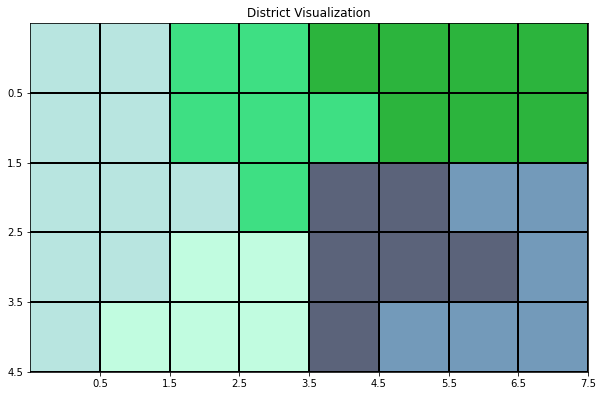

In [33]:
ASSIGN_W = 5
ASSIGN_H = 8
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = SHIR
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()

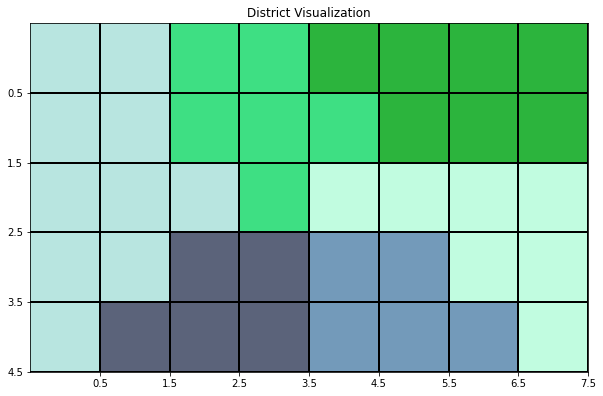

In [34]:
ASSIGN_W = 5
ASSIGN_H = 8
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = MCF
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()

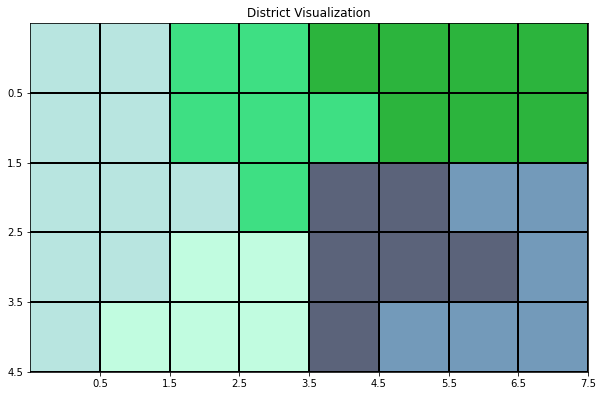

In [35]:
ASSIGN_W = 5
ASSIGN_H = 8
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = DIST
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()

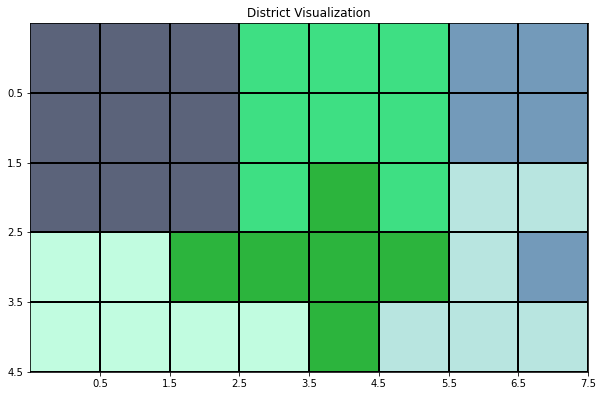

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()

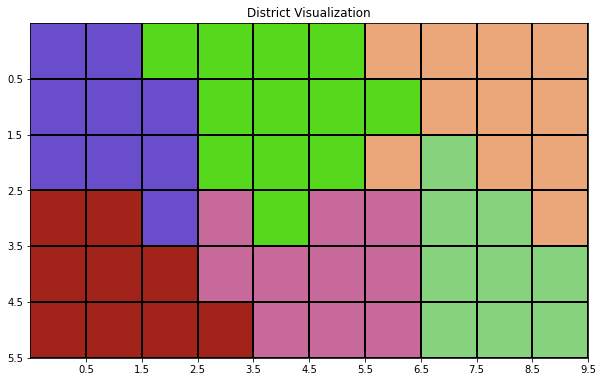

In [9]:
ASSIGN_W = 6
ASSIGN_H = 10
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = hess
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()

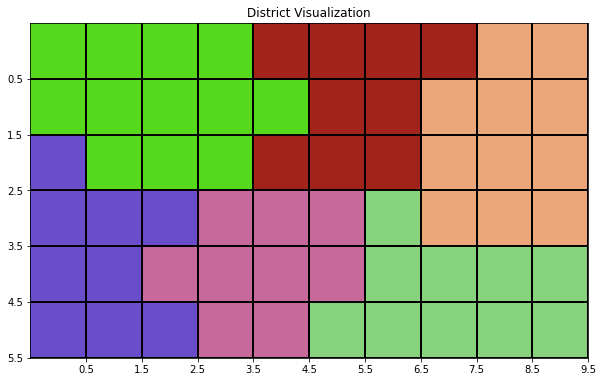

In [12]:
ASSIGN_W = 6
ASSIGN_H = 10
districtSet = ["d1","d2","d3","d4", "d5","d6"]
assignDict = CUT
data_list = []
for i in range(ASSIGN_W):
    temp_list = []
    for j in range(ASSIGN_H):
        temp_list.append(assignDict["n_x{}_y{}".format(i,j)])
    data_list.append(temp_list)

data_list.reverse()

data = data_list
cmap = colors.ListedColormap(custom_color)
norm = colors.BoundaryNorm(bounds, cmap.N)
norm = colors.BoundaryNorm(bounds+[bounds[-1]+1], cmap.N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0.5, ASSIGN_H+0.5, 1))
ax.set_yticks(np.arange(0.5, ASSIGN_W+0.5, 1))
#ax.set_xticklabels(H)
#ax.set_yticklabels(W)
ax.set_title('District Visualization')
#plt.legend(handles=coloar_patches)
plt.show()